In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


ruta_dataset= "zoo.csv"
df = pd.read_csv(ruta_dataset) 




In [3]:
df.head()

,animal_name,hair,feathers,eggs,milk,airbone,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,antelope,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,1.0
1,bass,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0
2,bear,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0
3,boar,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,1.0
4,buffalo,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,1.0


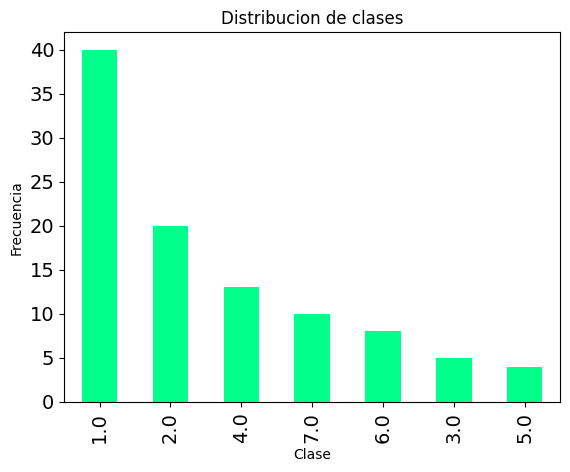

type
1.0    40
2.0    20
4.0    13
7.0    10
6.0     8
3.0     5
5.0     4
Name: count, dtype: int64


In [4]:
class_counts = df['type'].value_counts()
class_counts.plot(kind= 'bar',fontsize=14,color='#00ff8b')
plt.title('Distribucion de clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()
print(class_counts)

In [5]:
#Eliminaremos animal_name puesto que no será necesaria
df.drop(['animal_name'],axis=1, inplace= True)
df.head()

,hair,feathers,eggs,milk,airbone,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,1.0


In [6]:
from sklearn.model_selection import train_test_split 
import numpy as np

X = df.drop('type', axis=1)  # Variables independientes
y = df['type']  # Variable dependiente

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Imprimir porcentajes de clase positiva en el conjunto de entrenamiento y prueba
print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')


% Positive class in Train = 40.58
% Positive class in Test = 38.71


Valores nulos en y_train: 1


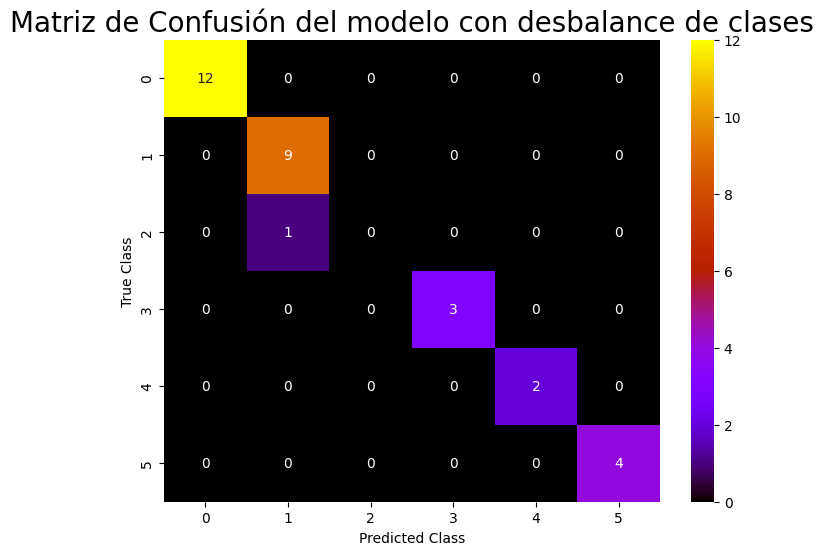

Clases en y_test: [7. 2. 1. 6. 4. 3.]
Distribución en y_train:
type
1.0    28
2.0    11
4.0    10
7.0     6
6.0     6
5.0     4
3.0     4
Name: count, dtype: int64
Distribución en y_test:
type
1.0    12
2.0     9
7.0     4
4.0     3
6.0     2
3.0     1
Name: count, dtype: int64


Accuracy = 0.97
Recall (macro) = 0.83



In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.impute import SimpleImputer

# Imprimir la cantidad de NaN en y_train
print(f'Valores nulos en y_train: {y_train.isnull().sum()}')

# Manejo de valores nulos en y_train
if y_train.isnull().any():
    imputer = SimpleImputer(strategy='most_frequent')  # Imputación con la moda
    y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).flatten()
else:
    y_train_imputed = y_train

# Verificar si hay NaN en X_train
if X_train.isnull().any().any():
    imputer_X = SimpleImputer(strategy='mean')  # Imputación con la media
    X_train_imputed = imputer_X.fit_transform(X_train)
else:
    X_train_imputed = X_train

# Entrenamos el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train_imputed, y_train_imputed)

# Realizamos predicciones
predictions = model.predict(X_test)



# Matriz de confusión
c_matrix = confusion_matrix(y_test, predictions)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
plt.title("Matriz de Confusión del modelo con desbalance de clases", size=20)
sns.heatmap(c_matrix, annot=True, cmap="gnuplot", fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


print("Clases en y_test:", y_test.unique())

print("Distribución en y_train:")
print(y_train.value_counts())

print("Distribución en y_test:")
print(y_test.value_counts())
# Evaluar el modelo
print("\n")
print(f'Accuracy = {accuracy_score(y_test, predictions):.2f}\nRecall (macro) = {recall_score(y_test, predictions, average="macro"):.2f}\n')


In [8]:
import numpy as np
import pandas as pd  # Asegúrate de importar pandas
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Verificar si hay valores nulos en y (el objetivo)
print(f'Valores nulos en y: {y.isnull().sum()}')

if y.isnull().any():
    imputer_y = SimpleImputer(strategy='most_frequent')  # Imputar con la moda
    y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1)).flatten()
else:
    y_imputed = y

# Verificar si hay valores nulos en X (las características)
if X.isnull().any().any():
    imputer_X = SimpleImputer(strategy='mean')  # Imputar valores nulos en X con la media
    X_imputed = imputer_X.fit_transform(X)
else:
    X_imputed = X

# Aplicar SMOTE con k_neighbors reducido
smote = SMOTE(random_state=42, k_neighbors=2)  # Ajustar k_neighbors a 2 para evitar el error
X_sm, y_sm = smote.fit_resample(X_imputed, y_imputed)

# Imprimir cambios de tamaño
print(f'''Cambio de X antes de SMOTE: {X.shape} 
Cambio de X después de SMOTE: {X_sm.shape}''')

# Imprimir el balance de las clases después de aplicar SMOTE
print("\n\n (+/-) Balance de las clases (%): ")
unique, counts = np.unique(y_sm, return_counts=True)
for class_label, count in zip(unique, counts):
    print(f"Clase {class_label}: {100 * count / len(y_sm):.2f}%")

# Crear un DataFrame con los datos transformados
df_smote = pd.DataFrame(X_sm, columns=X.columns)  # Asegúrate de que X tenga nombres de columnas
df_smote['target'] = y_sm  # Agregar la columna objetivo

# Guardar el DataFrame como zoo_smote.csv
df_smote.to_csv('zoo_smote.csv', index=False)
print("Dataset transformado guardado como 'zoo_smote.csv'")


Valores nulos en y: 1
Cambio de X antes de SMOTE: (101, 16) 
Cambio de X después de SMOTE: (287, 16)


 (+/-) Balance de las clases (%): 
Clase 1.0: 14.29%
Clase 2.0: 14.29%
Clase 3.0: 14.29%
Clase 4.0: 14.29%
Clase 5.0: 14.29%
Clase 6.0: 14.29%
Clase 7.0: 14.29%
Dataset transformado guardado como 'zoo_smote.csv'


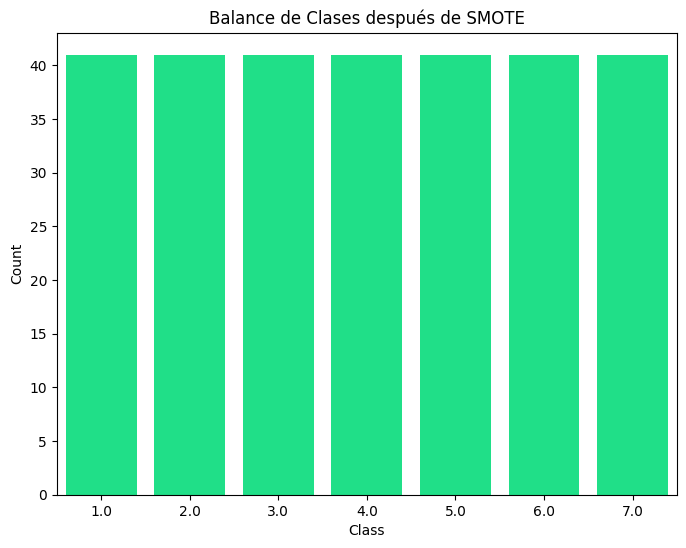

In [188]:
# Mostrar el balance de las clases después de aplicar SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_sm,color="#00ff8b")
plt.title("Balance de Clases después de SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


Accuracy = 0.99
Recall = 0.99



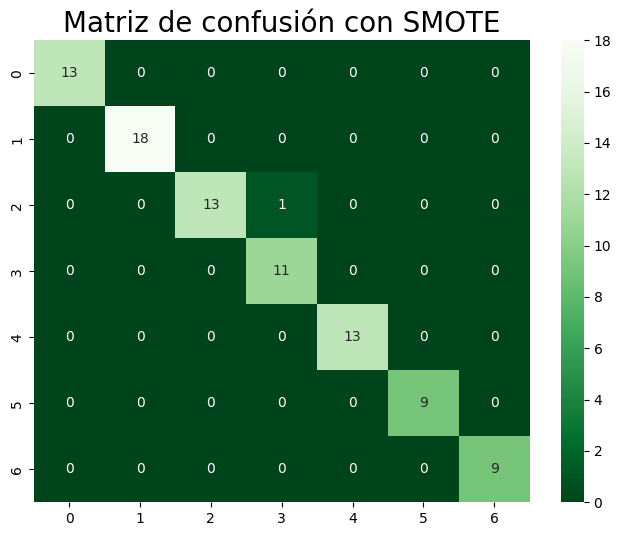

In [189]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenamiento y división del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.30, random_state=42)

# Entrenar el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Generar las predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Calcular las métricas
print(f'Accuracy = {accuracy_score(y_test, predictions):.2f}')
print(f'Recall = {recall_score(y_test, predictions, average="weighted"):.2f}\n')

# Crear la matriz de confusión
c_matrix = confusion_matrix(y_test, predictions)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
plt.title("Matriz de confusión con SMOTE", size=20)
sns.heatmap(c_matrix, annot=True, cmap="Greens_r", fmt='g')
plt.show()
